# Journal Names

Questions in the context of fuzzy matching.

* How many journal names appear more than once?
* What is the average length of the duplicated names vs the unique names?


Input file is a single larger JSON, mapping names to issns.
```json
{
  "Acta Orientalia.": [
    "0001-6438"
  ],
  "Acta Orientalia (København)": [
    "0001-6438"
  ],
..
```

In [4]:
import json
import pandas as pd

In [5]:
with open("../data/name_to_issn.json") as f:
    mapping = json.load(f)


We have about 3M keys.

In [7]:
len(mapping)

2929727

In [21]:
df = pd.DataFrame(((k, len(v)) for k, v in mapping.items()), columns=["name", "issn_count"])

In [25]:
len(df)

2929727

In [26]:
df.head()

,name,issn_count
0,Acta Orientalia.,1
1,Acta Orientalia (København),1
2,The publishers weekly.,1
3,Publishers weekly,1
4,ASMT news,1


In [31]:
unique_name = df[df.issn_count == 1]

In [32]:
repeated_names = df[df.issn_count > 1]

In [34]:
len(repeated_names)

194241

In [33]:
len(repeated_names) / len(df)

0.06630003409874026

About 6% (or 194241) names are repeated. 

In [35]:
repeated_names.describe()

,issn_count
count,194241.000000
mean,3.197523
std,25.081605
min,2.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,8980.000000


Which name is shared by over 8000 ISSN?

In [40]:
repeated_names.iloc[repeated_names.issn_count.argmax()] # Annual report.

name          Annual report.
issn_count              8980
Name: 45907, dtype: object

It is the "Annual report."

In [42]:
mapping["Annual report."][:10]

['0706-537X',
 '1186-7957',
 '2324-1926',
 '1445-9248',
 '0872-3982',
 '1714-1524',
 '1037-8812',
 '0225-0241',
 '1327-6344',
 '0702-7702']

On average a repeated name will point to 3 ISSN. About 24k names point to more than 3 ISSN.

In [45]:
len(repeated_names[repeated_names.issn_count > 3])

24107

In [49]:
repeated_names[repeated_names.issn_count > 3].sample(n=10)

,name,issn_count
322100,Philosophica.,17
183928,Edad de oro.,4
294309,Horoskop.,10
517039,Le Grand journal.,11
1664616,Caleidoscop şcolar.,4
258430,La Feuille.,34
309546,The Wilson quarterly.,4
795859,Introductory research essay,4
1470838,Publicaciones del SEMYR.,4
657041,Le Kiosque.,14


In [50]:
mapping["Philosophica."]

['1285-9133',
 '1480-4670',
 '1487-5349',
 '1724-6598',
 '2183-0134',
 '2538-693X',
 '2610-8933',
 '2035-8326',
 '2295-9084',
 '1517-8889',
 '2249-5053',
 '2420-9198',
 '2654-9263',
 '2610-8925',
 '1158-9574',
 '0872-4784',
 '0379-8402']

<AxesSubplot:>

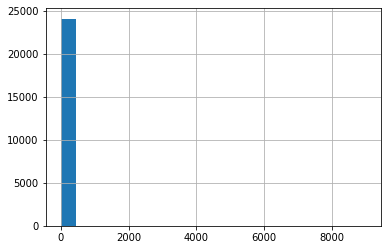

In [61]:
repeated_names[repeated_names.issn_count > 3].issn_count.hist(bins=20)

<AxesSubplot:>

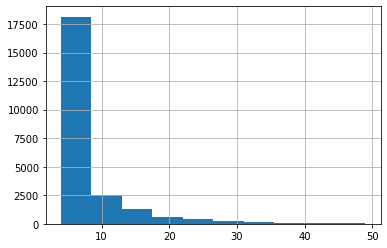

In [60]:
repeated_names[(repeated_names.issn_count > 3) & (repeated_names.issn_count < 50)].issn_count.hist(bins=10)

<AxesSubplot:>

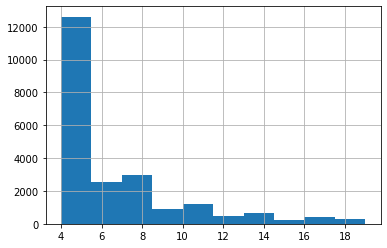

In [62]:
repeated_names[(repeated_names.issn_count > 3) & (repeated_names.issn_count < 20)].issn_count.hist(bins=10)

<AxesSubplot:>

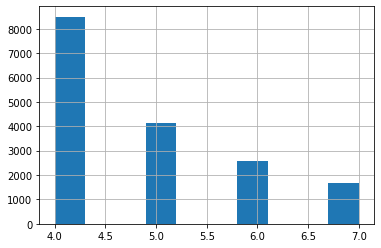

In [64]:
repeated_names[(repeated_names.issn_count > 3) & (repeated_names.issn_count < 8)].issn_count.hist()

<AxesSubplot:>

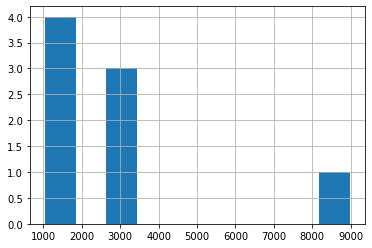

In [70]:
repeated_names[repeated_names.issn_count > 1000].issn_count.hist(bins=10)

In [71]:
repeated_names[repeated_names.issn_count > 1000]

,name,issn_count
3499,Bulletin.,2752
7632,Newsletter.,2715
8317,Rapport.,1050
23662,Proceedings.,1403
45839,Annual report /,1090
45907,Annual report.,8980
45964,Annuaire.,1260
47217,Rapport annuel.,2656


In [72]:
repeated_names[repeated_names.issn_count > 500]

,name,issn_count
102,Bulletin d'information.,693
3218,Bulletin de liaison.,510
3499,Bulletin.,2752
7632,Newsletter.,2715
8317,Rapport.,1050
23662,Proceedings.,1403
45794,Report.,743
45839,Annual report /,1090
45907,Annual report.,8980
45964,Annuaire.,1260


In [75]:
repeated_names[repeated_names.issn_count > 200]

,name,issn_count
102,Bulletin d'information.,693
2665,Newsletter /,259
3218,Bulletin de liaison.,510
3499,Bulletin.,2752
3926,Boletín.,216
...,...,...
425644,Rapport d'activité ...,394
532500,Relatório e contas.,247
603144,Bildung und Beruf regional.,292
1006131,Vies de famille.,222


In [76]:
repeated_names[repeated_names.issn_count > 100]

,name,issn_count
102,Bulletin d'information.,693
2665,Newsletter /,259
3218,Bulletin de liaison.,510
3499,Bulletin.,2752
3926,Boletín.,216
...,...,...
1306798,Country commerce.,120
1318569,Bible studies for life.,159
1796742,LexisNexis practice guide.,101
2628387,Operational risk report.,119


In [82]:
repeated_names

,name,issn_count
5,Activitas Nervosa Superior.,2
11,Library journal.,2
23,Acta cardiologica.,2
26,Actualidad económica.,3
31,Acta Ornithologica.,3
...,...,...
2929626,Modern machine shop México.,2
2929635,Lecture notes in control and information scien...,2
2929646,Critical Studies in Dance Leadership and Inclu...,2
2929691,Nigerian Journal of Wildlife Management,2


If a name matches a repeated name exactly or fuzzy matches to a repeated name and there is not other information available, the match status must be ambigious.